<a href="https://colab.research.google.com/github/Luis-Vilca/Examen_final/blob/main/ExamenFinal_Vilca_Aguilar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Ejercicio 1

In [26]:
"""
Establezca 2 modelos de clasificación para el data Iris
"""
import pandas as pd
import numpy as np
from sklearn import datasets

dfiris = datasets.load_iris()
#Se separa los features del target
X = dfiris.data
y = dfiris.target

#Se analiza la dimensionalidad vectorial
print(np.shape(X))
print(np.shape(y))
y=np.reshape(y,(len(y),1))

(150, 4)
(150,)


In [27]:
#Modelo 1 KNN:

from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split as tts

Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size = 0.3, random_state = 42)
#K 
modeloKNN = knn(n_neighbors=3)
modeloKNN.fit(Xtrain,ytrain)

from sklearn.metrics import recall_score, precision_score

ypredi1 = modeloKNN.predict(Xtest) 
ypredtrain = modeloKNN.predict(Xtrain)

#Métricas train

print("El score en entrenamiento es",modeloKNN.score(Xtrain,ytrain))
print("El recall en entrenamiento es",recall_score(ytrain,ypredtrain,average = None))
print("La precision en entrenamiento es",precision_score(ytrain,ypredtrain,average = None))

#Métricas validation

print("="*100)

print("El score en validación es",modeloKNN.score(Xtest,ytest))
print("El recall en validación es",recall_score(ytest,ypredi1,average = None))
print("La precision en validación es",precision_score(ytest,ypredi1,average = None))

El score en entrenamiento es 0.9428571428571428
El recall en entrenamiento es [1.         0.91891892 0.91891892]
La precision en entrenamiento es [1.         0.91891892 0.91891892]
El score en validación es 1.0
El recall en validación es [1. 1. 1.]
La precision en validación es [1. 1. 1.]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [28]:
#Modelo 2 Random Forest

from sklearn.ensemble import RandomForestClassifier as RFC

Xtrain, Xtest, ytrain, ytest = tts(X,y,test_size = 0.3,random_state = 42)
modeloRF = RFC(random_state = 42)
modeloRF.fit(Xtrain,ytrain)

from sklearn.metrics import recall_score, precision_score

ypredi1 = modeloRF.predict(Xtest) 
ypredtrain = modeloRF.predict(Xtrain)

#Métricas train

print("El score en entrenamiento es",modeloRF.score(Xtrain,ytrain))
print("El recall en entrenamiento es",recall_score(ytrain,ypredtrain,average = None))
print("La precision en entrenamiento es",precision_score(ytrain,ypredtrain,average = None))

#Métricas validation

print("="*100)

print("El score en validación es",modeloRF.score(Xtest,ytest))
print("El recall en validación es",recall_score(ytest,ypredi1,average = None))
print("La precision en validación es",precision_score(ytest,ypredi1,average = None))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


El score en entrenamiento es 1.0
El recall en entrenamiento es [1. 1. 1.]
La precision en entrenamiento es [1. 1. 1.]
El score en validación es 1.0
El recall en validación es [1. 1. 1.]
La precision en validación es [1. 1. 1.]


###Ejercicio 2

In [29]:
"""
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""
import pandas as pd
dfhouses = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv")
display(dfhouses.head())


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [30]:
import numpy as np

X = np.array(dfhouses.drop(columns = ['Suburb', 'Address','Type', 'Price','Method','SellerG','Date', 'Postcode','Car','BuildingArea', 'YearBuilt','CouncilArea','Lattitude','Longtitude','Regionname','Propertycount']))
y = np.array(dfhouses['Price'])

In [31]:
print(X[0,:])
print(np.shape(X)) 

[  2.    2.5   2.    1.  202. ]
(13580, 5)


In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Estandarización
scaler2 = StandardScaler().fit(X)
X_standarized = scaler2.transform(X)

#Escalamiento
escalador = MinMaxScaler()
X_escalado = escalador.fit_transform(X_standarized)

print(X_escalado[0,:])

[0.11111111 0.05197505 0.1        0.125      0.0004665 ]


In [33]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
pca1.fit(X_escalado)
Xpca = pca1.transform(X_escalado)

print(np.shape(Xpca))
print(np.shape(y))
print(np.shape(pca1.components_))

(13580, 2)
(13580,)
(2, 5)


In [34]:
print(X_escalado[0,:])
print("-"*100)
print(Xpca[0,:])

[0.11111111 0.05197505 0.1        0.125      0.0004665 ]
----------------------------------------------------------------------------------------------------
[-0.20165642  0.0433002 ]


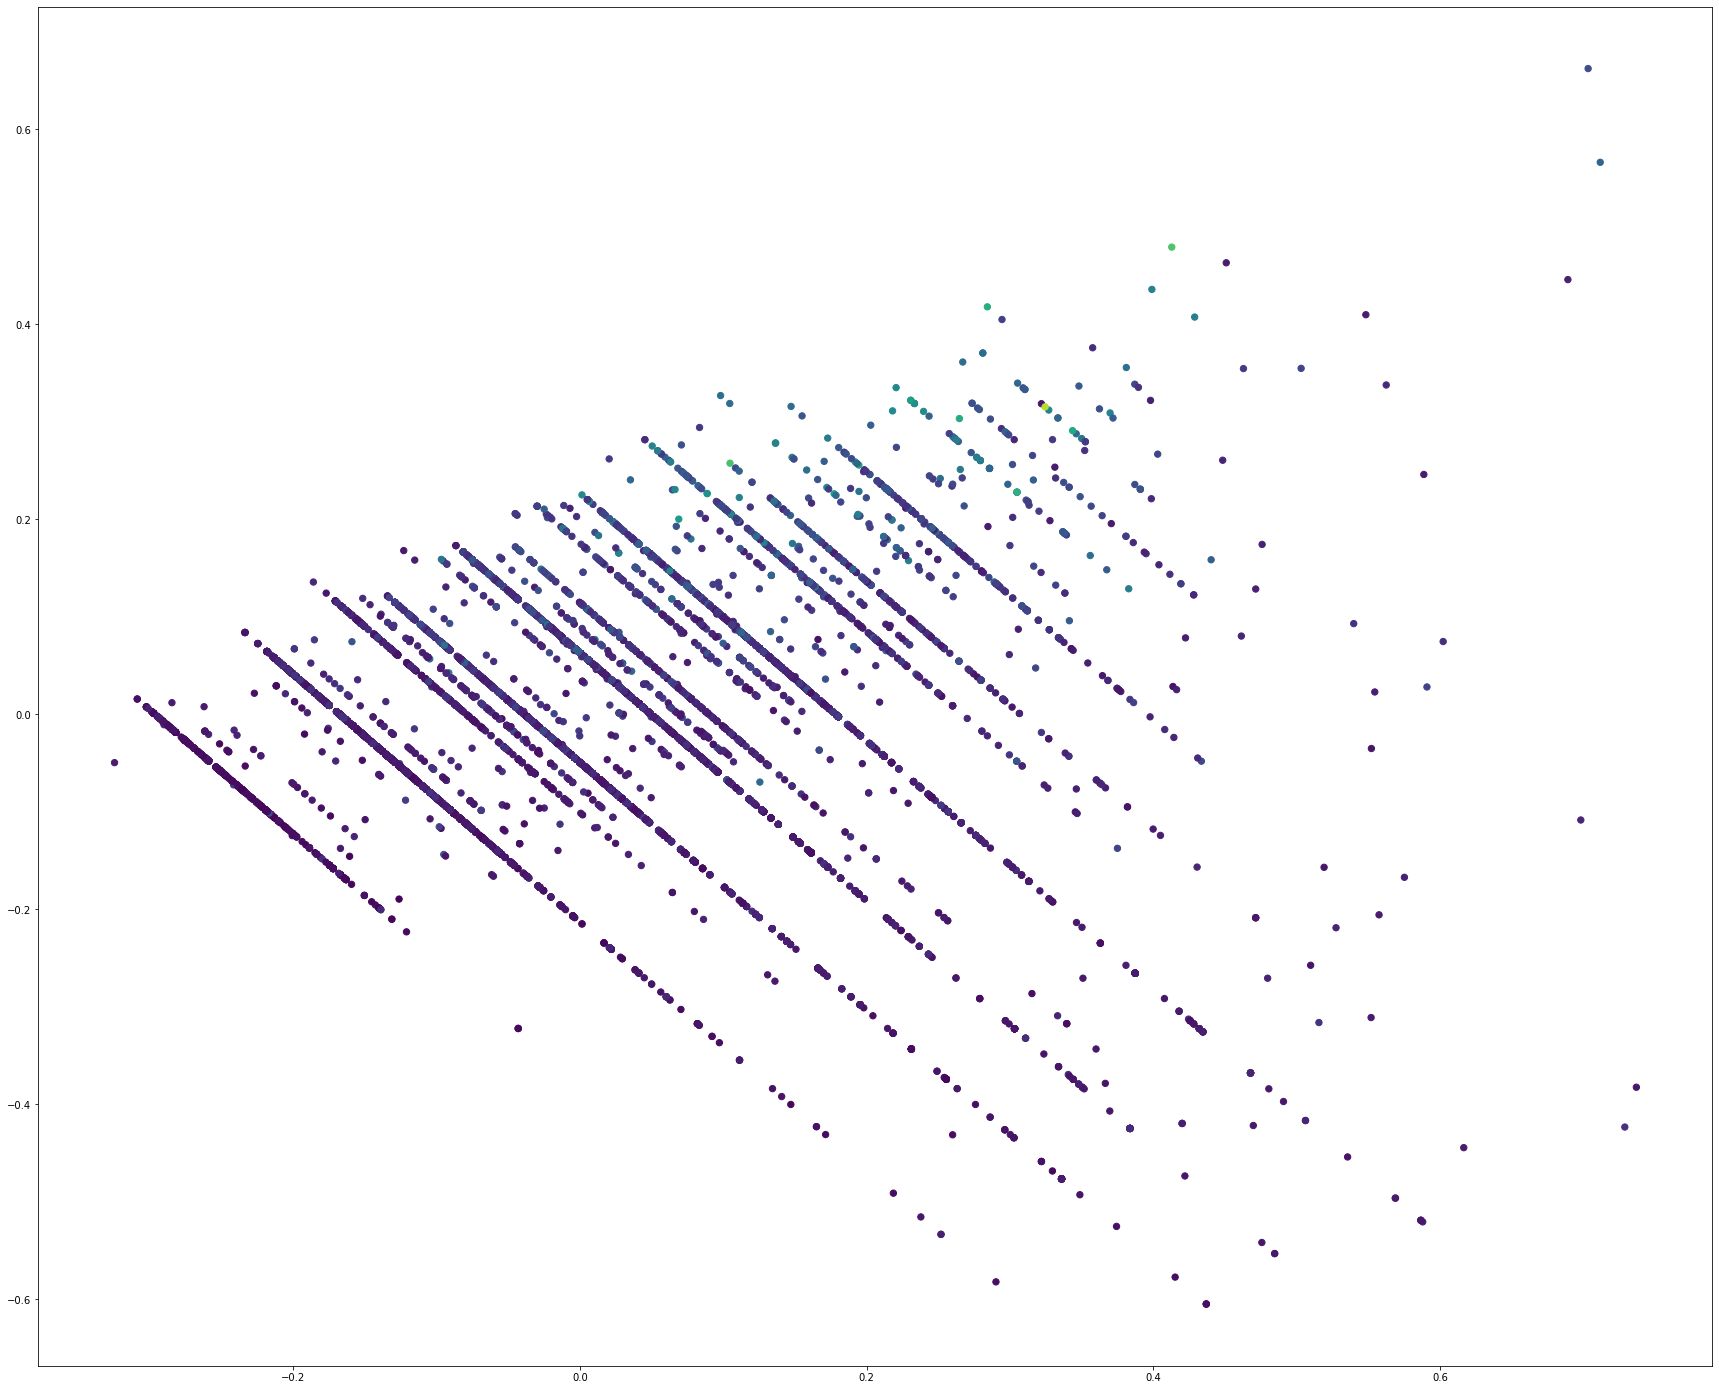

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,25))
plt.scatter(Xpca[:,0],Xpca[:,1],c= y,s = 40)
plt.show()

In [36]:
#Modelo con PCA
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

Xtrain, Xtest, ytrain, ytest = tts(Xpca,y,test_size = 0.3)
modeloRFR = RFR(random_state = 42, n_estimators=100)
modeloRFR.fit(Xtrain,ytrain)
 
ypredtrain = modeloRFR.predict(Xtrain)
ypredi = modeloRFR.predict(Xtest)

#Métricas train
print("El r2 en entrenamiento es",r2_score(ytrain,ypredtrain))
print("Mean squared error: ", mean_squared_error(ytrain,ypredtrain))

#Métricas validation

print("="*100)
print("El r2 en validación es",r2_score(ytest,ypredi))
print("Mean squared error: ", mean_squared_error(ytest,ypredi))

El r2 en entrenamiento es 0.8668663683907659
Mean squared error:  54762896445.97079
El r2 en validación es 0.5120634377713884
Mean squared error:  196369577128.52634


In [37]:
#Modelo sin PCA
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error,r2_score

Xtrain, Xtest, ytrain, ytest = tts(X_escalado,y,test_size = 0.3)
modeloRFR = RFR(random_state = 42, n_estimators=100)
modeloRFR.fit(Xtrain,ytrain)
 
ypredtrain = modeloRFR.predict(Xtrain)
ypredi = modeloRFR.predict(Xtest)

#Métricas train
print("El r2 en entrenamiento es",r2_score(ytrain,ypredtrain))
print("Mean squared error: ", mean_squared_error(ytrain,ypredtrain))

#Métricas validation

print("="*100)
print("El r2 en validación es",r2_score(ytest,ypredi))
print("Mean squared error: ", mean_squared_error(ytest,ypredi))

El r2 en entrenamiento es 0.927873108418212
Mean squared error:  29570514736.75086
El r2 en validación es 0.5854627966657482
Mean squared error:  168156888043.56915


###Ejercicio 3

In [38]:
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""
import pandas as pd
df_wine = pd.read_excel("/content/wine.xlsx")
display(df_wine.head())

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [39]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

X = np.array(df_wine['price'])
y = np.array(df_wine['points'])

X = np.reshape(X,(len(X),1))
y = np.reshape(y,(len(y),1))

#Rellenar datos
from numpy.core.numeric import NaN
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = NaN, strategy='mean')
X_imputer = imp_mean.fit_transform(X)


In [41]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

Xtrain, Xtest, ytrain, ytest = tts(X_imputer,y,test_size = 0.3)
modeloRFR = RFR(random_state = 42, n_estimators=200)
modeloRFR.fit(Xtrain,ytrain)
 
ypredtrain = modeloRFR.predict(Xtrain)
ypredi = modeloRFR.predict(Xtest)

#Métricas train
print("El r2 en entrenamiento es",r2_score(ytrain,ypredtrain))
print("Mean squared error: ", mean_squared_error(ytrain,ypredtrain))

#Métricas validation

print("="*100)
print("El r2 en validación es",r2_score(ytest,ypredi))
print("Mean squared error: ", mean_squared_error(ytrain,ypredtrain))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


El r2 en entrenamiento es 0.355803030460232
Mean squared error:  6.700547475198424
El r2 en validación es 0.3480594238437462
Mean squared error:  6.700547475198424


**No, con los parámetros se aprecia un subajuste del modelo.**

###Ejercicio 4

In [42]:
"""
Puedes graficar un modelo de deep leraning para la dataset de breast-cancer
"""
import pandas as pd
dfbreast = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/breast-cancer.csv")
display(dfbreast.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
#Procesamiento de datos
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

X = np.array(dfbreast.drop(columns = ['id','diagnosis']))
#Estandarización
scaler2 = StandardScaler().fit(X)
X_standarized = scaler2.transform(X)

#Escalamiento
escalador = MinMaxScaler()
X_escalado = escalador.fit_transform(X_standarized)

y = np.array(dfbreast['diagnosis'])
Encoder = LabelEncoder()
y = Encoder.fit_transform(y)
y = np.reshape(y,(len(y),1))

In [48]:
from sklearn.model_selection import train_test_split as tts
import tensorflow as tf

Xtrain,Xtest,ytrain,ytest = tts(X_escalado,y)

#Verificar
ModeloClasificador = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(16,activation='relu'),
      tf.keras.layers.Dense(8,activation='relu'),
      tf.keras.layers.Dense(4,activation='relu'),
      tf.keras.layers.Dense(2,activation='relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])

ModeloClasificador.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')

ModeloClasificador.fit(Xtrain,ytrain,epochs = 500)


Epoch 1/500
14/14 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.6197
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.6197
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.6197
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.6197
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6197
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.6197
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6197
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6197
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.6197
Epoch 10/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.6197
Epoch 11/

In [49]:
#Para comprobar el ajuste del modelo
from sklearn.metrics import recall_score, confusion_matrix

ypred_train = np.round(ModeloClasificador.predict(Xtrain),0)
ypred_test = np.round(ModeloClasificador.predict(Xtest),0)

recall_clasificadortest = recall_score(ytest,ypred_test)
recall_clasificadort = recall_score(ytrain,ypred_train)
print(recall_clasificadort)
print(recall_clasificadortest)

0.9753086419753086
1.0


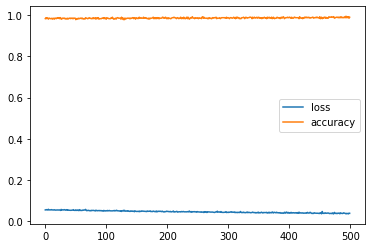

In [47]:
historico = ModeloClasificador.fit(Xtrain,ytrain,epochs = 500,verbose = False)
pd.DataFrame(historico.history).plot()

###Ejercicio 5

In [55]:
"""
Crea una función que aplane la ruta de una imagen
"""
from PIL import Image
import matplotlib.pyplot as plt

def aplanarimagen():
  ruta = input('Ingrese la ruta de la imagen ')
  print("="*100)
  imagen = plt.imread(ruta)
  plt.imshow(imagen)
  imagen_vector = imagen.flatten()
  print("La imagen después de ser aplanada tiene la siguiente dimensión",np.shape(imagen_vector))

Ingrese la ruta de la imagen /content/imagen_gato.jfif
la imagen después de ser aplanada tiene la siguiente dimensión (151590,)


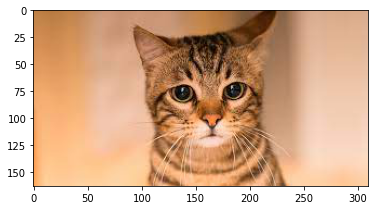

In [56]:
aplanarimagen()